# Sklearn: La bibliothèque la mieux utilisée en machine learning

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
np.random.seed(0) # fixer la graine
m = 100 # 
X = np.linspace(0, 10, m).reshape(m, 1) # deux dimmensions
y = X + np.random.randn(m, 1) # deux dimansions

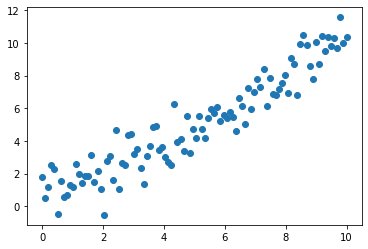

In [22]:
plt.scatter(X, y)

In [23]:
from sklearn.linear_model import LinearRegression

# toujour les 4 étapes reviennes
## model = LinearRegression(.............)
## model.fit(X, y) : entrainer le model avec des données X, y (divisées en deux tableaux numpy)
## model.score(X, y): evaluer le model
## model.predict(X): utilisé le model pour prédire



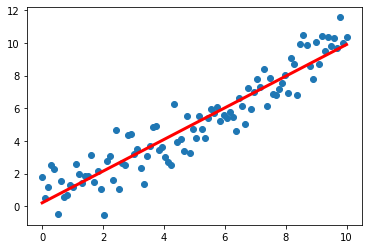

In [24]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y) # par la m"thode des moindres carrés R²

predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, c='r', lw=3)

# Un autre model Support Vecteur Machine: SVM

In [25]:
np.random.seed(0) # fixer la graine
m = 100 # 
X = np.linspace(0, 10, m).reshape(m, 1) # deux dimmensions
y = X**2 + np.random.randn(m, 1) # deux dimansions

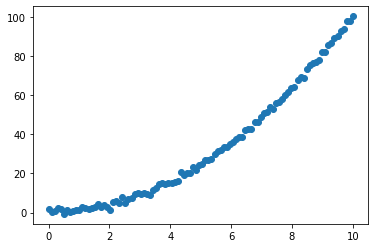

In [26]:
plt.scatter(X, y)

In [13]:
from sklearn.svm import SVR

/home/ndaosif/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


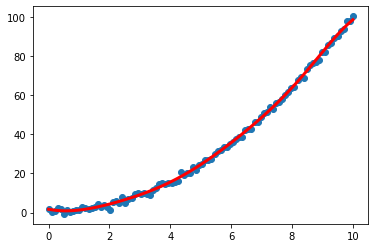

In [29]:
model = SVR(C=100) # choix d'un hyperparamètre C=100
model.fit(X, y)
model.score(X, y) # par la m"thode des moindres carrés R²

predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, c='r', lw=3)

# Problème de classification

In [30]:
import seaborn as sns

In [31]:
# chargement des datasets depuis la librarie
titanic = sns.load_dataset("titanic")
titanic.shape
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [33]:
# filtrage de mon dataset
titanic = titanic[['survived','pclass','sex','age']] # selection du jeu de données de mon travail dans le dataset
titanic.dropna(axis=0, inplace = True) # suppression des lignes ayant au moins une valeur manquante
titanic['sex'].replace(['male', 'female'], [0, 1], inplace = True) # change male et female par bool  (0, 1)
titanic.head(10)

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
6,0,1,0,54.0
7,0,3,0,2.0
8,1,3,1,27.0
9,1,2,1,14.0
10,1,3,1,4.0


In [34]:
from sklearn.neighbors import KNeighborsClassifier # choix du module pour le model de classification

In [35]:
model = KNeighborsClassifier()  # le model

In [37]:
"""
notre tableau doit être divisé en features(X) et label ou target(y)
nous voulons predire si un passager va survivre (y = titanic['survived']) ou pas
"""
X = titanic.drop('survived', axis=1) #ou X = titanic[['pclass','sex','age']]
y = titanic['survived']

In [42]:
model.fit(X, y)
model.score(X, y)

0.8319327731092437

In [55]:
def survie(model, pclass= 3, sex = 0, age = 26):  # fonction qui permet de predire si une personne lamda suvivra ou non
    x = np.array([pclass, sex, age]).reshape(1, 3)   # x aura 3 colonnes
    print(model.predict(x)) # ou print(model.predict_proba(x)) pour voir le poucentage de survi et celui de non survi

In [56]:
survie(model)

[0]


# EXERCICE

In [61]:
def meilleurscore():
    list_score =[]
    for i in range(1, 11):
        model = KNeighborsClassifier(n_neighbors=i)
        X = titanic.drop('survived', axis=1) 
        y = titanic['survived']
        model.fit(X, y)
        list_score.append(model.score(X, y))
        
    print(max(list_score))

In [62]:
meilleurscore()

0.8585434173669467
